In [1]:
import torch
from torchvision import datasets, transforms
import numpy as np

data_train = datasets.MNIST(root="./dataset",train=True,download=True,transform=transforms.ToTensor())
data_test = datasets.MNIST(root="./dataset",train=False,download=True,transform=transforms.ToTensor())

In [2]:
len(data_train)

60000

In [3]:
len(data_test)

10000

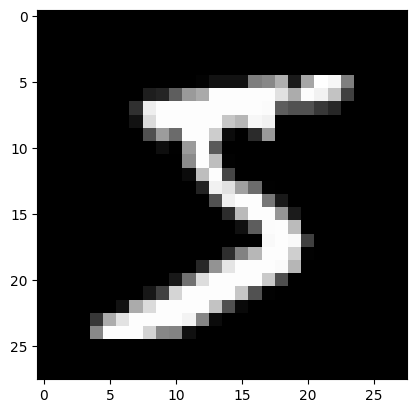

In [4]:
from matplotlib import pyplot as plt

image, label = data_train[0]

plt.imshow(image.squeeze().numpy(),cmap='gray')
plt.show()

In [5]:
import torch.nn as nn
import torch.nn.functional as F 

class UnkownNet(nn.Module):
    def __init__(self):
        super(UnkownNet,self).__init__()

        self.fc1 = nn.Linear(784,1)
        self.activation = nn.Sigmoid()

    def forward(self,input):

        f2 = self.fc1(input)

        output = self.activation(f2)

        return output
    
net = UnkownNet()


In [6]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(),lr=0.01)
loss_func = nn.BCELoss()
loss_func_test = nn.BCELoss()

In [7]:
train_dataset = []

for x , y in data_train:

    if y % 2 != 0:
        y = np.array([1])
    else :
        y = np.array([0])

    x = x.squeeze().reshape(-1).numpy()

    train_dataset.append([x,y])

test_dataset = []

for x , y in data_test:

    if y % 2 != 0:
        y = np.array([1])
    else :
        y = np.array([0])

    x = x.squeeze().reshape(-1).numpy()

    test_dataset.append([x,y])

In [8]:
from torch.utils.data import dataset, DataLoader

train_dataloader = DataLoader(train_dataset,batch_size=600,shuffle=True)
test_dataloader = DataLoader(test_dataset,batch_size=100,shuffle=True)

In [9]:
print(len(train_dataloader))
print(len(test_dataloader))

100
100


In [10]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

In [11]:
epochs = 2000

for epoch in range(epochs):

    loss_sum = 0.0
    test_sum = 0.0

    for (train_features,train_labels),(test_features,test_labels) in zip(train_dataloader,test_dataloader) :

        epoch_y = net(train_features)
        loss = loss_func(epoch_y.to(torch.float32),train_labels.to(torch.float32))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        for m in net.modules():
            if isinstance(m,nn.Linear):
                writer.add_histogram('weight',m.weights.data,epoch + 1)

        loss_sum += loss
        
        epoch_test_y = net(test_features)

        loss_test = loss_func_test(epoch_test_y.to(torch.float32),test_labels.to(torch.float32))

        test_sum += loss_test

    loss = loss_sum / len(train_dataloader)
    test = test_sum / len(test_dataloader)

    print('Epoch {:4d}/{} train_loss: {:.6f},test_loss: {:.6f}'.format(
        epoch+1, epochs, loss, test
    ))

    if loss < 0.1 :
        break


Epoch    1/2000 train_loss: 0.572560,test_loss: 0.564816
Epoch    2/2000 train_loss: 0.465444,test_loss: 0.457203
Epoch    3/2000 train_loss: 0.422180,test_loss: 0.414072
Epoch    4/2000 train_loss: 0.398154,test_loss: 0.390033
Epoch    5/2000 train_loss: 0.382498,test_loss: 0.374875
Epoch    6/2000 train_loss: 0.371387,test_loss: 0.363798
Epoch    7/2000 train_loss: 0.362979,test_loss: 0.355382
Epoch    8/2000 train_loss: 0.356329,test_loss: 0.348871
Epoch    9/2000 train_loss: 0.350901,test_loss: 0.343437
Epoch   10/2000 train_loss: 0.346357,test_loss: 0.338946
Epoch   11/2000 train_loss: 0.342477,test_loss: 0.335064
Epoch   12/2000 train_loss: 0.339088,test_loss: 0.331828
Epoch   13/2000 train_loss: 0.336135,test_loss: 0.328863
Epoch   14/2000 train_loss: 0.333485,test_loss: 0.326325
Epoch   15/2000 train_loss: 0.331095,test_loss: 0.324042
Epoch   16/2000 train_loss: 0.328950,test_loss: 0.321812
Epoch   17/2000 train_loss: 0.326980,test_loss: 0.319973
Epoch   18/2000 train_loss: 0.3

In [12]:
in_x, y = data_train[804]

print(y)

print(net(in_x.squeeze().reshape(-1)))

4
tensor([0.1234], grad_fn=<SigmoidBackward0>)
